In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os


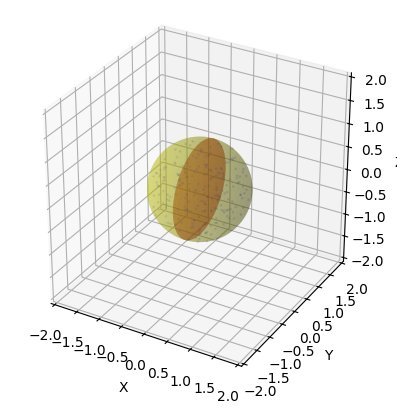

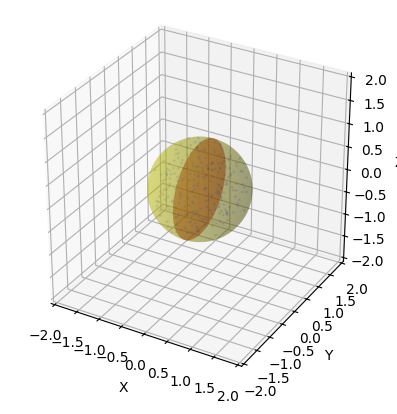

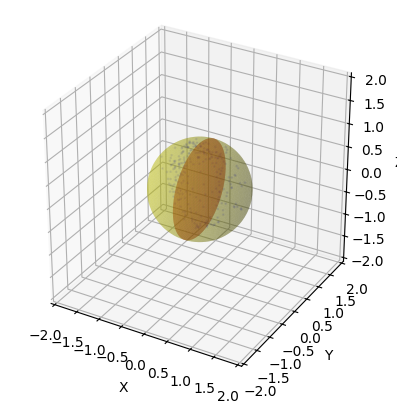

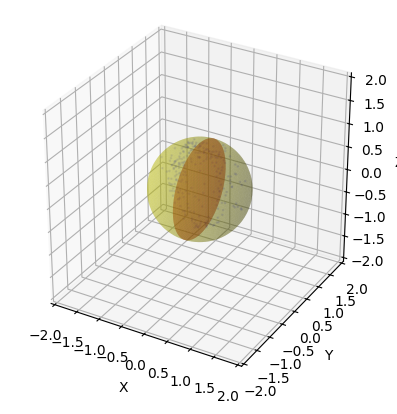

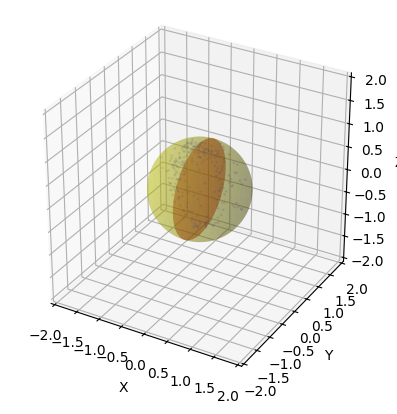

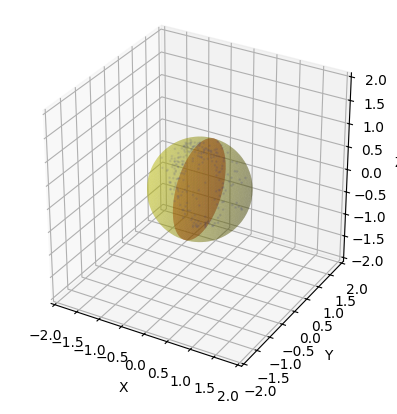

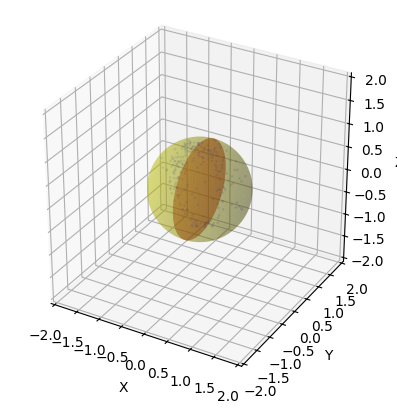

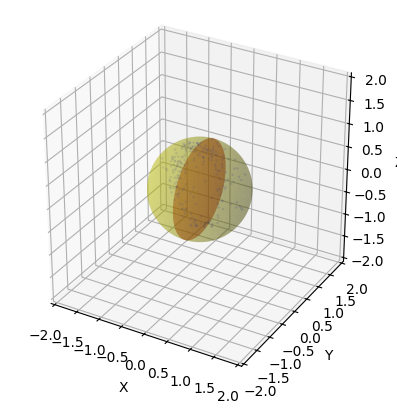

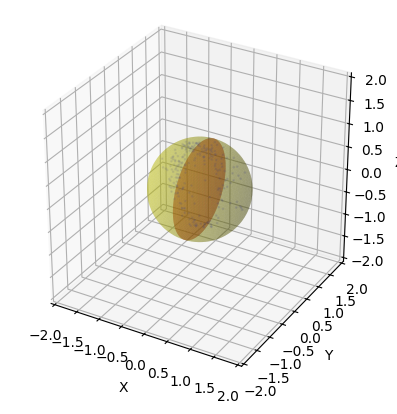

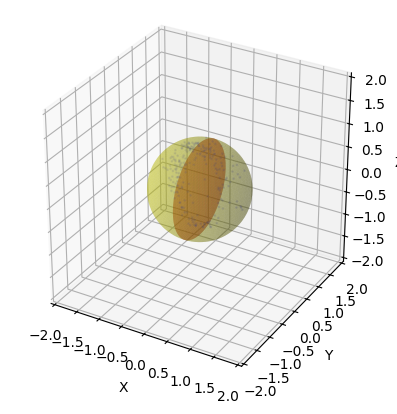

In [5]:
# Directory where your .npy files are stored
data_directory = './noInflux_random_sims/temp'
# Updated to only include files that end with '.npy'
file_names = sorted([f for f in os.listdir(data_directory) if f.endswith('.npy')])

# Function to load data
def load_data(frame_number):
    file_path = os.path.join(data_directory, file_names[frame_number])
    return np.load(file_path)

# # Set up the figure and 3D axis


for i in range(10):
    data = load_data(i)
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]
    inside = x**2 + y**2 + z**2 < 1
    x, y, z = x[inside], y[inside], z[inside]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='b', marker='o', s=1, alpha=0.1)

    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='y', alpha=0.3, label='Sphere')
    x_plane = np.zeros_like(y)  # Constant x values
    ax.plot_surface(x_plane, y, z, color='r', alpha=0.3, label='y-z plane')

    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    # Set perspective projection
    ax.set_proj_type('persp')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_box_aspect([3,3,3])
    plt.show()